# Experiment Report

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [44]:
experiments = ['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37.json',
 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70.json']

In [7]:
root = "/mnt/storage/log-experiments/"
# experiments = [f for f in os.listdir(root+"logs/") if f[-4:] == 'json'][-2:]
results = {}
for exp in experiments:
    exp_name = exp[:-5]
    try:
        with open(root+"results/" + exp, 'r') as f:
            results[exp_name] = json.load(f)
    except:
        pass


In [8]:
# list(results['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-090503-43'].items())[11][1]['rewards']

In [9]:
# results
experiments[0][:-5]

'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87'

In [10]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))

In [11]:
episode_count

{'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87': [46,
  30,
  105,
  53,
  47,
  31,
  86,
  45,
  57,
  33,
  54,
  48,
  67,
  76,
  33,
  52,
  66,
  70,
  50,
  26,
  50,
  73,
  86,
  103,
  41,
  30,
  100,
  53,
  49,
  42,
  39,
  30,
  88,
  74,
  45,
  70,
  58,
  56,
  47,
  37,
  57,
  57,
  41,
  44,
  44,
  35,
  37,
  40,
  64,
  56,
  80,
  40,
  64,
  44,
  59,
  54,
  61,
  73,
  44,
  47,
  60,
  57,
  96,
  70,
  24,
  51,
  31,
  38,
  124,
  97,
  36,
  34,
  34,
  41,
  64,
  58,
  55,
  51,
  48,
  65,
  58,
  51,
  79,
  53,
  48,
  53,
  46,
  32,
  38,
  32,
  44,
  55,
  44,
  30,
  32,
  47,
  44,
  51,
  50,
  56,
  54,
  39,
  42,
  49,
  30,
  57,
  51,
  57,
  67,
  88,
  64,
  45,
  35,
  58,
  54,
  42,
  68,
  39,
  47,
  66,
  36,
  58,
  55,
  126,
  76,
  65,
  31,
  42,
  118,
  130,
  57,
  55,
  48,
  39,
  80,
  75,
  64,
  31,
  52,
  97,
  41,
  28,
  88,
  75,
  100,
  64,
  64,
  84,
  74,
  24],
 'DQN_Malmo_Seq-MinecraftBasicNew-

In [12]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))

    

means
55.95333333333333
86.39333333333333
146.33333333333334

deviations
21.079954669991324
39.6512961816999
14.264485814622116


In [13]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for step in data['steps']:
            steps_count[exp_name].append(step)

In [14]:
len(steps_count[exp_name])

21950

In [15]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
44.832122006433934
52.55436376263601
50.330751708428245

deviations
23.523711479614153
23.19754399911343
20.57772502772071


In [16]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for reward in data['rewards']:
            rewards_count[exp_name].append(reward)

In [17]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
0.502042416299297
0.45049841808781543
0.3613667425968109

deviations
0.5167115605023727
0.5186791681373443
0.5086100929831986


In [45]:
experiments_dp = {
    'focused experience sharing': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87',
    'baseline': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37',
    'regular experience sharing': 'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70'
}

In [47]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))

In [151]:
def plot(results, experiments, selected_experiments, colors):
    plt.figure(figsize=(10,4))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid()
    for exp_name, color in zip(selected_experiments, colors):
        exp_id = experiments[exp_name]
        sns.distplot(results[exp_id], label=exp_name, color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    # plt.ylim(0, 0.06)
        


In [ ]:
colors = ['#003FFF', '#03ED3A', '#E8000B']

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


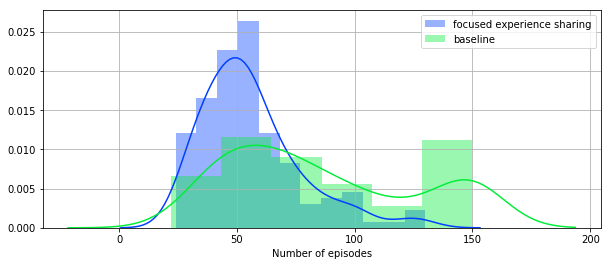

In [181]:
plot(episode_count, experiments_dp, ['focused experience sharing', 'baseline'], ['#003FFF', '#03ED3A'])
plt.savefig('res1.png', dpi=300)

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


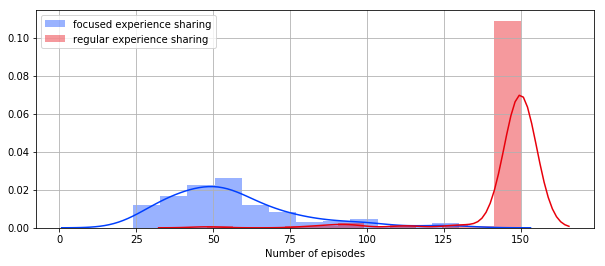

In [182]:
plot(episode_count, experiments_dp, ['focused experience sharing', 'regular experience sharing'], ['#003FFF', '#E8000B'])
plt.savefig('res2.png', dpi=300)

/home/lucas/.conda/envs/marlo/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


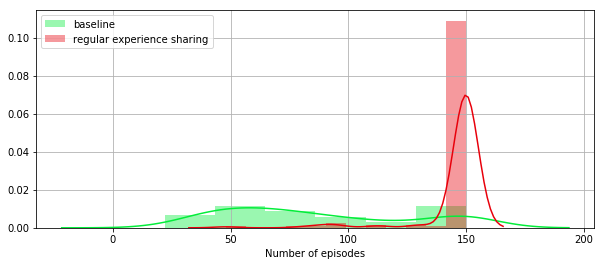

In [183]:
plot(episode_count, experiments_dp, ['baseline', 'regular experience sharing'], ['#03ED3A', '#E8000B'])
plt.savefig('res3.png', dpi=300)

In [ ]:
# compare 3 in number of episodes, steps, and rewards

In [116]:
graph = {}

In [117]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for step in data['steps']:
            steps_count[exp_name].append(step)
            
graph['Number of Steps - Mean'] = []
for k,v in steps_count.items():
    graph['Number of Steps - Mean'].append(np.mean(v))

graph['Number of Steps - Std Deviation'] = []
for k,v in steps_count.items():
    graph['Number of Steps - Std Deviation'].append(np.std(v))

    

In [118]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        for reward in data['rewards']:
            rewards_count[exp_name].append(reward)
            
            
graph['Episode Total Reward - Mean'] = []
for k,v in rewards_count.items():
    graph['Episode Total Reward - Mean'].append(np.mean(v))

graph['Episode Total Reward - Std Deviation'] = []
for k,v in rewards_count.items():
    graph['Episode Total Reward - Std Deviation'].append(np.std(v))


In [119]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = []
    for agent_trial, data in results[exp_name].items():
        if len(data['rewards']) >= 0: # manually remove outliers
            episode_count[exp_name].append(len(data['rewards']))
            
graph['Number of Episodes - Mean'] = []
for k,v in episode_count.items():
    graph['Number of Episodes - Mean'].append(np.mean(v))

graph['Number of Episodes - Std Deviation'] = []
for k,v in episode_count.items():
    graph['Number of Episodes - Std Deviation'].append(np.std(v))

In [120]:
graph

{'Number of Steps - Mean': [44.832122006433934,
  52.55436376263601,
  50.330751708428245],
 'Number of Steps - Std Deviation': [23.523711479614153,
  23.19754399911343,
  20.57772502772071],
 'Episode Total Reward - Mean': [0.502042416299297,
  0.45049841808781543,
  0.3613667425968109],
 'Episode Total Reward - Std Deviation': [0.5167115605023727,
  0.5186791681373443,
  0.5086100929831986],
 'Number of Episodes - Mean': [55.95333333333333,
  86.39333333333333,
  146.33333333333334],
 'Number of Episodes - Std Deviation': [21.079954669991324,
  39.6512961816999,
  14.264485814622116]}

In [127]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=experiments_dp.keys()
df = df.round(decimals=2)
df.style.set_properties(**{'text-align': 'center'})
df.head(10)

,focused experience sharing,baseline,regular experience sharing
Number of Steps - Mean,44.83,52.55,50.33
Number of Steps - Std Deviation,23.52,23.20,20.58
Episode Total Reward - Mean,0.50,0.45,0.36
Episode Total Reward - Std Deviation,0.52,0.52,0.51
Number of Episodes - Mean,55.95,86.39,146.33
Number of Episodes - Std Deviation,21.08,39.65,14.26


In [170]:
df.head(10)

,focused experience sharing,baseline,regular experience sharing
Number of Steps - Mean,44.83,52.55,50.33
Number of Steps - Std Deviation,23.52,23.20,20.58
Episode Total Reward - Mean,0.50,0.45,0.36
Episode Total Reward - Std Deviation,0.52,0.52,0.51
Number of Episodes - Mean,55.95,86.39,146.33
Number of Episodes - Std Deviation,21.08,39.65,14.26


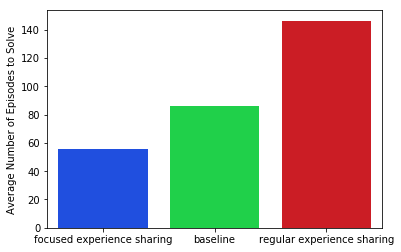

In [203]:
colors = ['#003FFF', '#03ED3A', '#E8000B']
sns.barplot(x=df.columns, y=df.loc['Number of Episodes - Mean'], palette=colors)
# plt.grid(which='major', axis='y')
plt.ylabel("Average Number of Episodes to Solve")
plt.savefig('res4.png', dpi=300)


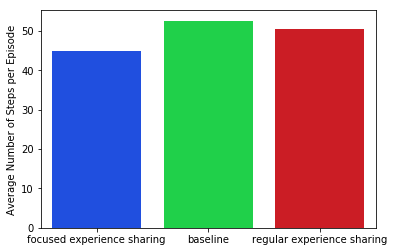

In [204]:
sns.barplot(x=df.columns, y=df.loc['Number of Steps - Mean'], palette=colors)
plt.ylabel("Average Number of Steps per Episode")
plt.savefig('res5.png', dpi=300)


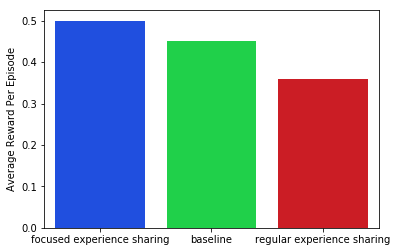

In [205]:
sns.barplot(x=df.columns, y=df.loc['Episode Total Reward - Mean'], palette=colors)
plt.ylabel("Average Reward Per Episode")
plt.savefig('res6.png', dpi=300)



In [130]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  focused experience sharing &  baseline &  regular experience sharing \\
\midrule
Number of Steps - Mean               &  44.83                      &  52.55    &   50.33                     \\
Number of Steps - Std Deviation      &  23.52                      &  23.20    &   20.58                     \\
Episode Total Reward - Mean          &   0.50                      &   0.45    &    0.36                     \\
Episode Total Reward - Std Deviation &   0.52                      &   0.52    &    0.51                     \\
Number of Episodes - Mean            &  55.95                      &  86.39    &  146.33                     \\
Number of Episodes - Std Deviation   &  21.08                      &  39.65    &   14.26                     \\
\bottomrule
\end{tabular}



In [142]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37


Ks_2sampResult(statistic=0.38000000000000006, pvalue=4.0153193719165587e-10)


DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70


Ks_2sampResult(statistic=0.94, pvalue=9.164090116035275e-60)


DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37 vs  DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70


Ks_2sampResult(statistic=0.74, pvalue=3.3609879978650472e-37)




I have a result to show. But can I really show this? I'm not really sure it is reliable. Why so many 150 in a row? I want to run the same test backwards. First the False, then the True for sharing. It might be something with the machine - it might have been busy.

But I won't probably trust no result I have. There is something I actually generated, I will use it, if I remove outliers, results won't be so different.